In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = "drive/MyDrive/datasets/gender_classification_dataset/gender-classification-dataset"
training_data_path = dataset_path + "/Training"
validation_data_path = dataset_path + "/Validation"

In [ ]:
import os
import json

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as function
from torch.utils.data import Dataset
import torchvision.models as models
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.transforms as transform
from torchvision.datasets.folder import default_loader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
male_training_files = os.listdir(training_data_path + '/male')
print("Total number of training examples for male data: ", len(male_training_files))

Total number of training examples for male data:  23775


In [ ]:
female_training_files = os.listdir(training_data_path + '/female')
print("Total number of training examples for female data: ", len(female_training_files))

Total number of training examples for female data:  23273


In [ ]:
dataset = ImageFolder(training_data_path, transform=ToTensor())

In [ ]:
count = 0
for image, _ in dataset:
    print(image.shape)
    if count == 10:
        break
    count += 1

torch.Size([3, 114, 92])
torch.Size([3, 110, 88])
torch.Size([3, 100, 80])
torch.Size([3, 102, 85])
torch.Size([3, 107, 86])
torch.Size([3, 102, 79])
torch.Size([3, 104, 89])
torch.Size([3, 99, 78])
torch.Size([3, 98, 76])
torch.Size([3, 118, 84])
torch.Size([3, 111, 80])


In [ ]:
# resizing all images to 64x64 using transform.Resize()
transformed_data = transform.Compose([transform.Resize([64,64]), transform.ToTensor()])
dataset = ImageFolder(training_data_path, transform=transformed_data)

In [ ]:
image, label = dataset[10]
print(image.shape, label)
image

torch.Size([3, 64, 64]) 0


tensor([[[0.9412, 0.9686, 0.9765,  ..., 0.2196, 0.2549, 0.2784],
         [0.9529, 0.9765, 0.9686,  ..., 0.2118, 0.2392, 0.2627],
         [0.9608, 0.9686, 0.9686,  ..., 0.2000, 0.2157, 0.2353],
         ...,
         [0.5961, 0.5843, 0.5804,  ..., 0.2314, 0.2314, 0.2314],
         [0.6118, 0.6039, 0.5922,  ..., 0.2275, 0.2353, 0.2353],
         [0.6392, 0.6314, 0.6157,  ..., 0.2392, 0.2431, 0.2275]],

        [[0.8196, 0.8431, 0.8471,  ..., 0.0784, 0.1137, 0.1333],
         [0.8235, 0.8431, 0.8392,  ..., 0.0706, 0.0980, 0.1176],
         [0.8157, 0.8235, 0.8235,  ..., 0.0588, 0.0784, 0.0941],
         ...,
         [0.4000, 0.3882, 0.3804,  ..., 0.1255, 0.1176, 0.1176],
         [0.4157, 0.4078, 0.3961,  ..., 0.1216, 0.1216, 0.1137],
         [0.4431, 0.4353, 0.4196,  ..., 0.1255, 0.1216, 0.1059]],

        [[0.6392, 0.6745, 0.6824,  ..., 0.0157, 0.0510, 0.0706],
         [0.6510, 0.6745, 0.6745,  ..., 0.0078, 0.0353, 0.0549],
         [0.6510, 0.6627, 0.6667,  ..., 0.0039, 0.0196, 0.

In [ ]:
count = 0
for image, _ in dataset:
    print(image.shape)
    if count == 10:
        break
    count += 1

torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])


In [ ]:
# print the classes
print(dataset.classes)

['female', 'male']


In [ ]:
# function to get image from the dataset by providing the index
def get_image(dataset, index):
    if index in range(len(dataset)):
        image, label = dataset[index]
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[0], cmap='gray')
        if label == 0:
            print("Label: ", "Female")
        else:
            print("Label: ", "Male")

Label:  Male


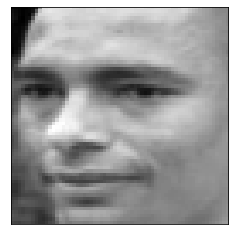

In [ ]:
get_image(dataset, randint(1, len(dataset)))

In [ ]:
random_seed = 0
torch.manual_seed(random_seed)

In [ ]:
val_size = 2009
train_size = len(dataset) - val_size

train_dataset, validation_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset), len(validation_dataset)

(45039, 2009)

In [ ]:
batch_size = 64

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dataloader = DataLoader(validation_dataset, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def show_examples(data_loader):
    for images, label in data_loader:
        fig, ax = plt.subplots(figsize=(16,9))
        plt.xticks([])
        plt.yticks([])
        ax.imshow(make_grid(images, nrow=12).permute(1,2,0))
        break

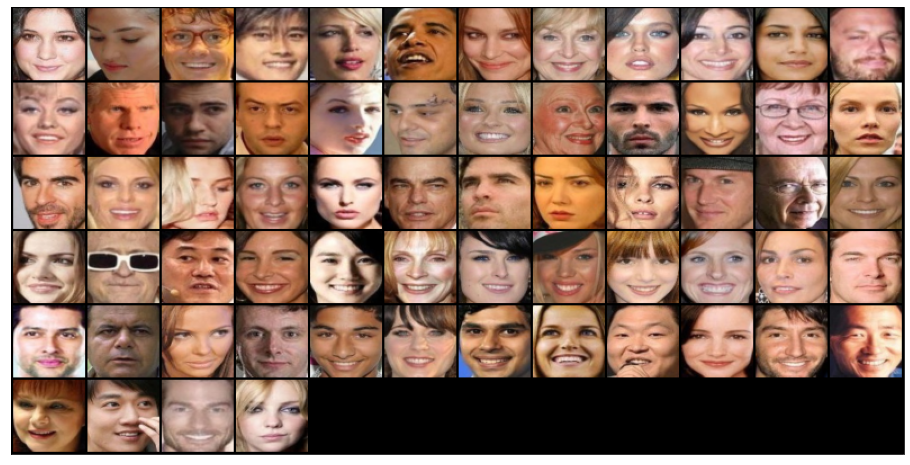

In [ ]:
show_examples(train_dataloader)

In [ ]:
# preparing the image classification model

# implementing a convolution operation on a 1 channel image with a 3x3 kernel.
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro):
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 2, 2, 3],
    [2, 0, 0, 2, 2],
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2],
    [2, 2, 0],
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dataloader:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([64, 3, 64, 64])
out.shape: torch.Size([64, 8, 32, 32])


In [ ]:
class ImageClassificaionBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images) #Generate Predictions
        loss = function.cross_entropy(out, labels) #calculate loss
        return loss

    def validation_step(self, batch):
        images,labels = batch
        out = self(images) #Generate Predictions
        loss = function.cross_entropy(out,labels) #calculate loss
        acc = accuracy(out, labels) #accuracy
        return {'val_loss': loss.detach(),'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses  = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  #combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  #combine accuracies
        return {'val_loss': epoch_loss.item(),'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _,preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
class GenderCNNModel(ImageClassificaionBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),    #out: 64 x 32 x 32

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1 ,padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),    #out : 128 x 16 x 16

        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),    #out: 256 x 8 x 8

        nn.Flatten(),
        nn.Linear(256 * 8 * 8, 8192),
        nn.ReLU(),

        nn.Linear(8192, 1024),
        nn.ReLU(),

        nn.Linear(1024, 2),
        nn.Softmax(dim=1))

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = GenderCNNModel()
model

GenderCNNModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=8192, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [ ]:
for images, labels in train_dataloader:
    print('images.shape : ', images.shape)
    out = model(images)
    print('out.shape : ', out.shape)
    print('out[0] : ', out[0])
    break

images.shape :  torch.Size([64, 3, 64, 64])
out.shape :  torch.Size([64, 2])
out[0] :  tensor([0.4962, 0.5038], grad_fn=<SelectBackward0>)


In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield(to_device(b, self.device))

    def __len__(self):
        return(len(self.dl)) #Total Batches

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_dataloader = DeviceDataLoader(train_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)
to_device(model, device)

GenderCNNModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=8192, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [ ]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, test_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr, weight_decay=1e-5)

    for epoch in range(epochs):
        # => Training Pahase
        model.train()
        train_losses =[]
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # => testing Phase
        result = evaluate(model, test_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(GenderCNNModel(), device)

In [ ]:
torch.save(model, "gender_classification_model.h5")

In [ ]:
torch.save(model.state_dict(), "gender_classification_state.h5")

In [ ]:
evaluate(model, test_dataloader)

{'val_loss': 0.6931053996086121, 'val_acc': 0.5103581547737122}

In [ ]:
num_epochs = 6
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
history = fit(num_epochs, lr, model, train_dataloader, test_dataloader, opt_func)

In [ ]:
torch.save(model.state_dict(), 'gender-2-cnn.h5')

In [ ]:
import seaborn as sns

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] * 100 for x in history]
    plt.figure(figsize=(8,6))
    sns.set_context('paper', font_scale=2)
    sns.lineplot(y=accuracies, x=range(num_epochs), marker="o")
    plt.xlabel('epoch')
    plt.ylabel('accuracy %')
    plt.title('Accuracy vs. No. of epochs')

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    sns.set_context('paper', font_scale=2)
    sns.lineplot(y=train_losses, x=range(num_epochs), marker="o")
    sns.lineplot(y=val_losses, x=range(num_epochs), marker="o")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
test_dataset = ImageFolder(validation_data_path, transform=transform)

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_dataset.classes[preds[0].item()]

In [ ]:
sns.set_context('paper', font_scale=1.4)
r = 3
c = 5
f, axarr = plt.subplots(r, c, figsize=(20,10))
for i in range(r):
    for j in range(c):
        img, label = test_dataset[randint(1, len(test_dataset))]
        axarr[i,j].imshow(img.permute(1, 2, 0))
        axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])
        axarr[i,j].title.set_text('Label:{0}, Predicted:{1}'.format(test_dataset.classes[label],predict_image(img, model)))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

In [ ]:
torch.save(model.state_dict(), 'gender-2-cnn.pth')
model2 = to_device(GenderCNNModel(), device)
model2.load_state_dict(torch.load('gender-2-cnn.pth'))
evaluate(model2, test_loader)